In [71]:
from google.colab import drive
import numpy as np
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow import keras
import tensorflow as tf

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(cf_matrix):
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='.3g')

  ax.set_title('Confusion Matrix\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['Failed','Passed'])
  ax.yaxis.set_ticklabels(['Failed','Passed'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

In [73]:
def process_data(data, headers):
    for header_idx, header in enumerate(headers):
        if header == "school":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "GP":
                    data[row_idx, header_idx] = 0
                else:
                    data[row_idx, header_idx] = 1
        elif header == "sex":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "F":
                    data[row_idx, header_idx] = 0
                else:
                    data[row_idx, header_idx] = 1
        elif header == "address":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "U":
                    data[row_idx, header_idx] = 0
                else:
                    data[row_idx, header_idx] = 1
        elif header == "famsize":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "LE3":
                    data[row_idx, header_idx] = 0
                else:
                    data[row_idx, header_idx] = 1
        elif header == "Pstatus":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "T":
                    data[row_idx, header_idx] = 0
                else:
                    data[row_idx, header_idx] = 1
        elif header == "Mjob" or header == "Fjob":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "teacher":
                    data[row_idx, header_idx] = 0
                elif data[row_idx, header_idx] == "health":
                    data[row_idx, header_idx] = 1
                elif data[row_idx, header_idx] == "services":
                    data[row_idx, header_idx] = 2
                elif data[row_idx, header_idx] == "at_home":
                    data[row_idx, header_idx] = 3
                else:
                    data[row_idx, header_idx] = 4
        elif header == "reason":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "home":
                    data[row_idx, header_idx] = 0
                elif data[row_idx, header_idx] == "reputation":
                    data[row_idx, header_idx] = 1
                elif data[row_idx, header_idx] == "course":
                    data[row_idx, header_idx] = 2
                else:
                    data[row_idx, header_idx] = 3
        elif header == "guardian":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "mother":
                    data[row_idx, header_idx] = 0
                elif data[row_idx, header_idx] == "father":
                    data[row_idx, header_idx] = 1
                else:
                    data[row_idx, header_idx] = 2
        elif (header == "schoolsup" or header == "famsup" or header == "paid"
            or header == 'activities' or header == 'nursery' or header == 'higher'
            or header == 'higher' or header == 'internet' or header == 'romantic'):
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "yes":
                    data[row_idx, header_idx] = 0
                else:
                    data[row_idx, header_idx] = 1
        elif (header == "G1" or header == "G2" or header == "G3"):
          for row_idx in range(len(data[0:, header_idx])):
            data[row_idx, header_idx] = int(int(data[row_idx, header_idx]) >= 10)
    return data.astype(int)

def get_data():
    with open('/content/drive/My Drive/Colab Notebooks/proj/student-por.csv') as f:
        por_data = np.genfromtxt(f, delimiter=';', dtype='unicode')  

    for row_idx in range(len(por_data)):
        for col_idx in range(len(por_data[row_idx])):
            por_data[row_idx, col_idx] = por_data[row_idx, col_idx].strip('"')
    
    por_headers = por_data[0,:]
    por_data = por_data[1:, :]

    with open('/content/drive/My Drive/Colab Notebooks/proj/student-mat.csv') as f:
        mat_data = np.genfromtxt(f, delimiter=';', dtype='unicode')  

    for row_idx in range(len(mat_data)):
        for col_idx in range(len(mat_data[row_idx])):
            mat_data[row_idx, col_idx] = mat_data[row_idx, col_idx].strip('"')
    mat_headers = mat_data[0,:]
    mat_data = mat_data[1:, :]

    return ((mat_headers,mat_data),(por_headers,por_data))

In [74]:
# read in data from csvs
(mat_headers, mat_data), (por_headers, por_data) = get_data()

# reformat data to all integers
por_data = process_data(por_data, por_headers)
mat_data = process_data(mat_data, mat_headers)

por_x = por_data[:, :-3]
por_g1 = por_data[:, -3]
por_g2 = por_data[:, -2]
por_g3 = por_data[:, -1]

mat_x = mat_data[:, :-3]
mat_g1 = mat_data[:, -3]
mat_g2 = mat_data[:, -2]
mat_g3 = mat_data[:, -1]

# Define Model

In [75]:
def get_dnn (X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, shuffle = True, random_state=2)
  dnn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_dim=X_train.shape[1], activation = 'relu'),
    tf.keras.layers.Dense(10, activation='relu'),      
    tf.keras.layers.Dense(10, activation='relu'),      
    tf.keras.layers.Dense(10, activation='relu'),           
    tf.keras.layers.Dense(1, activation='sigmoid')])

  dnn.compile(loss='BinaryCrossentropy', optimizer='SGD', metrics=['accuracy'])
  callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
  dnn.fit(X_train, y_train, epochs=150, batch_size=1, callbacks=[callback])
  score = dnn.evaluate(X_test, y_test, verbose=0)
  y_pred = (dnn.predict(X_test) > 0.5).astype("int32")
  c_mat = confusion_matrix(y_test, y_pred)
  return score[1], c_mat

# Perform analysis

In [76]:
por_g1_acc, por_g1_cmat = get_dnn(por_x, por_g1)
por_g2_acc, por_g2_cmat = get_dnn(por_x, por_g2)
por_g3_acc, por_g3_cmat = get_dnn(por_x, por_g3)

mat_g1_acc, mat_g1_cmat = get_dnn(mat_x, mat_g1)
mat_g2_acc, mat_g2_cmat = get_dnn(mat_x, mat_g2)
mat_g3_acc, mat_g3_cmat = get_dnn(mat_x, mat_g3)

Epoch 1/150
454/454 [==============================] - 1s 1ms/step - loss: 0.5792 - accuracy: 0.7379
Epoch 2/150
454/454 [==============================] - 1s 1ms/step - loss: 0.5599 - accuracy: 0.7555
Epoch 3/150
454/454 [==============================] - 1s 1ms/step - loss: 0.5517 - accuracy: 0.7577
Epoch 4/150
454/454 [==============================] - 1s 2ms/step - loss: 0.5343 - accuracy: 0.7577
Epoch 5/150
454/454 [==============================] - 1s 1ms/step - loss: 0.5390 - accuracy: 0.7577
Epoch 6/150
454/454 [==============================] - 1s 1ms/step - loss: 0.5232 - accuracy: 0.7577
Epoch 7/150
454/454 [==============================] - 1s 1ms/step - loss: 0.5256 - accuracy: 0.7577
Epoch 8/150
454/454 [==============================] - 1s 1ms/step - loss: 0.5138 - accuracy: 0.7577
Epoch 9/150
454/454 [==============================] - 1s 1ms/step - loss: 0.5160 - accuracy: 0.7577
Epoch 10/150
454/454 [==============================] - 1s 1ms/step - loss: 0.5177 - accura

# Portugese Accuracy

G1: 0.8358974456787109%


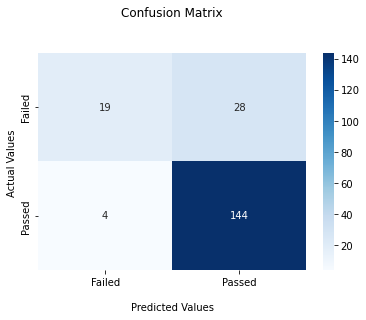

G2: 0.800000011920929%


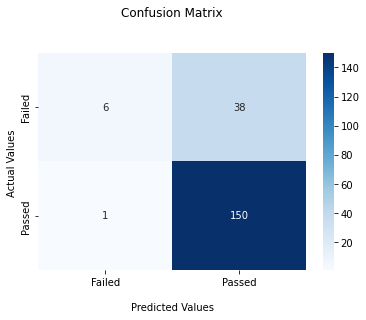

G3: 0.8666666746139526%


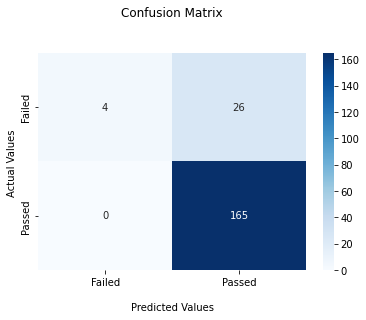

In [77]:
print(f"G1: {por_g1_acc}%")
plot_confusion_matrix(por_g1_cmat)
print(f"G2: {por_g2_acc}%")
plot_confusion_matrix(por_g2_cmat)
print(f"G3: {por_g3_acc}%")
plot_confusion_matrix(por_g3_cmat)

# Mathematics Accuracy

G1: 0.605042040348053%


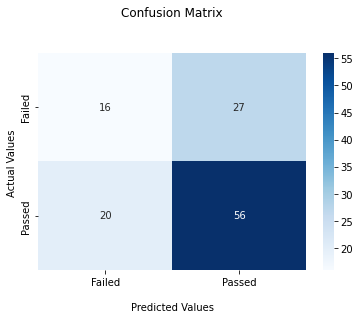

G2: 0.6386554837226868%


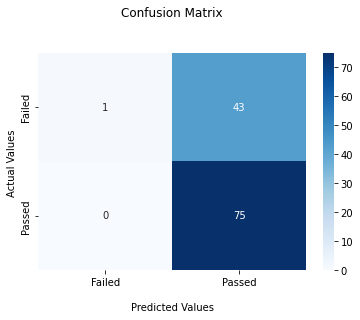

G3: 0.680672287940979%


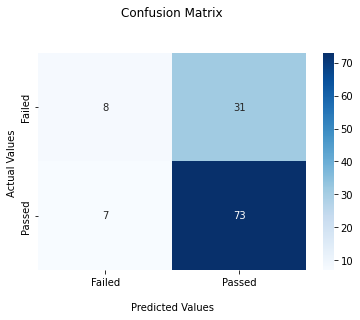

In [78]:
print(f"G1: {mat_g1_acc}%")
plot_confusion_matrix(mat_g1_cmat)
print(f"G2: {mat_g2_acc}%")
plot_confusion_matrix(mat_g2_cmat)
print(f"G3: {mat_g3_acc}%")
plot_confusion_matrix(mat_g3_cmat)